In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test_model import *
import numpy as np

/home/lucas/.conda/envs/research/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_path = "./checkpoints/baseline/iter_1590000.pth.tar"

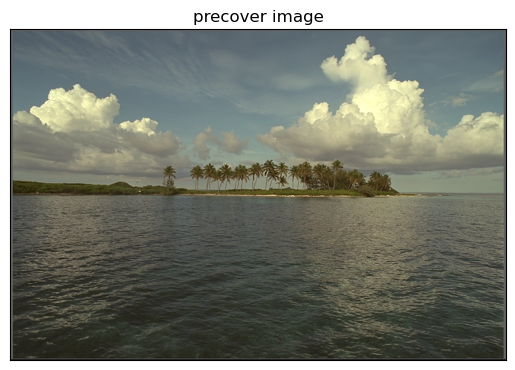

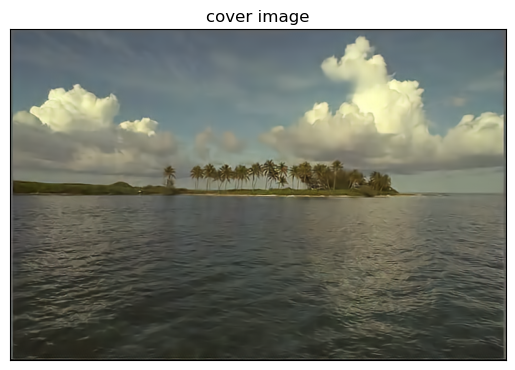

(0.32127055525779724, 31.489730834960938)

In [9]:
selection = np.random.choice(24,1)
selection = [15]
test(model_path,selection,plot=True,stega=False,p=0.3) # p is half the insertion rate

In [15]:
from tqdm import tqdm

P = np.linspace(0.01,1/3,50)

img_selection = list(range(24))

avg_PSNR_stega_cover = [test(model_path,img_selection,stega=True,p=p)[1] for p in tqdm(P)]

100%|██████████| 50/50 [03:10<00:00,  3.82s/it]


Regarder la différence entre stega et cover.
Faire steganalyse -> récupérer une base d'image

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def H(p):
    return -2*p*math.log(p,2) - (1-2*p)*math.log(1-2*p,2)

In [18]:
H_p = [H(p) for p in tqdm(P)]

100%|██████████| 50/50 [00:00<00:00, 228199.35it/s]


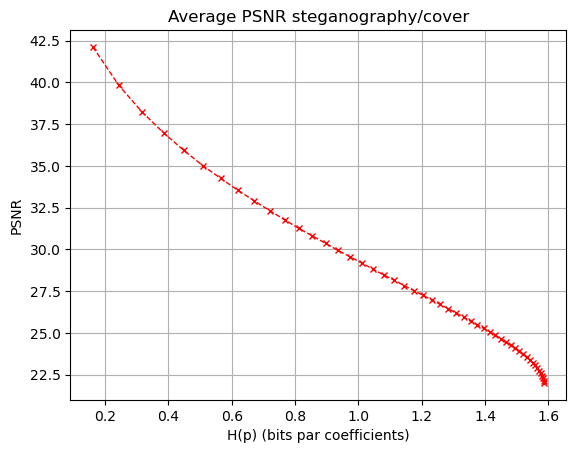

In [19]:
plt.plot(H_p,avg_PSNR_stega_cover,"--xr",markersize=5,lw=1)
plt.title("Average PSNR steganography/cover")
plt.xlabel("H(p) (bits par coefficients)")
plt.ylabel("PSNR")
plt.grid()
plt.show()

Text(42.597222222222214, 0.5, 'H(p) (bits)')

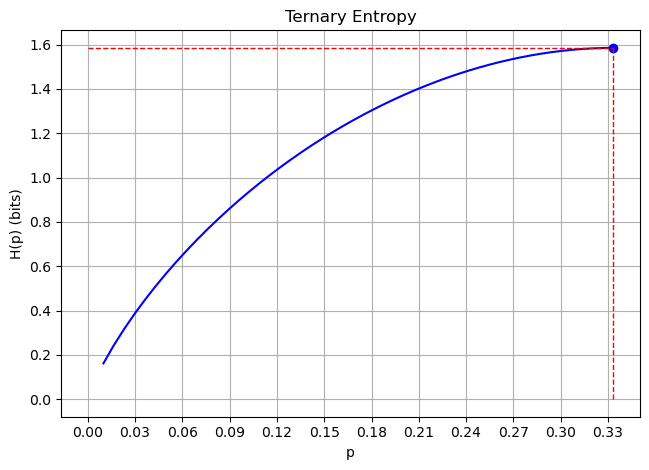

In [20]:
plt.plot(P,H_p,"-b")
plt.title("Ternary Entropy")
plt.plot([1/3],[H(1/3)],"ob")
plt.plot([1/3,1/3],[0,H(1/3)],"--r",lw=1)
plt.plot([0,1/3],[H(1/3),H(1/3)],"--r",lw=1)
plt.grid()
plt.xlabel("p")
plt.xticks(np.round(np.linspace(0,1/3,12),2))
plt.tight_layout()
plt.ylabel("H(p) (bits)")

In [3]:
H(1/30) # pour avoir 0.4 bits d'insertion

0.420026001688088

In [4]:
1/30

0.03333333333333333

In [5]:
H(0.25) # 1.5 bits, taux d'insertion 0.5

1.5

In [14]:
H(1/46) # 0.3 bits

0.3014969295343807

In [11]:
H(1/76)

0.20188081533118699

In [12]:
1/76

0.013157894736842105

In [5]:
H(0.0004)

0.010183864150778436

In [7]:
H(2e-4)

0.005492047537180206

In [4]:
H(1e-4)

0.0029460526282630473

In [4]:
H(4e-5)

0.0012841822244787718

In [2]:
H(8.35e-5)

0.0025034032872814937